<a id="2"></a>
<div style="text-align: left; background-color: #4CAF50; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1; border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">2| IMPORTING LIBRARIES📚</div>


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
from scipy import stats


In [2]:
from sklearn.impute import SimpleImputer

#cost fun
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score


from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest

#data scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn .ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRFRegressor

#classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn .ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [3]:
train=pd.read_csv(r'C:\Users\Lenovo\Downloads\data projects\comp\train.csv')
test=pd.read_csv(r'C:\Users\Lenovo\Downloads\data projects\comp\test.csv')

<a id="2"></a>
<div style="text-align: left; background-color: #4CAF50; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1; border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">2|understand data 🧠 </div>


In [4]:
train.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
train.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
train.describe(include='O')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


<a id="2"></a>
<div style="text-align: left; background-color: #4CAF50; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1; border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">4|data visualization and EDA 🥶 </div>


In [9]:
train['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [10]:
train['Count']=1
df_fat=train.groupby('NObeyesdad')['Count'].sum().reset_index()

fig2=px.pie(df_fat,values='Count',names='NObeyesdad',hole=0.4)

fig2.update_layout(title='NObeyesdad',title_x=0.48,annotations=[dict(text='NObeyesdad',font_size=15, showarrow=False,height=800,width=900)])
fig2.update_traces(textfont_size=15,textinfo='percent+label')
fig2.show()

In [11]:
category_order = train['NObeyesdad'].value_counts().index.tolist()

fig = px.histogram(train, x='NObeyesdad', category_orders={'NObeyesdad': category_order})
fig.show()

"***Obesity_Type_III*** appears to be the most prevalent in the data."

<Axes: xlabel='Gender', ylabel='count'>

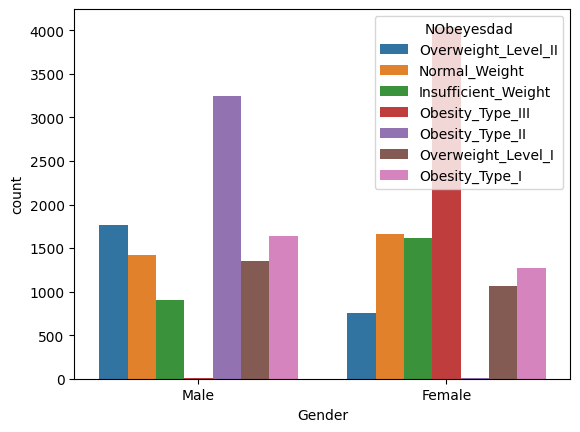

In [12]:
sns.countplot(x='Gender',hue='NObeyesdad',data=train)

Text(0, 0.5, 'Count')

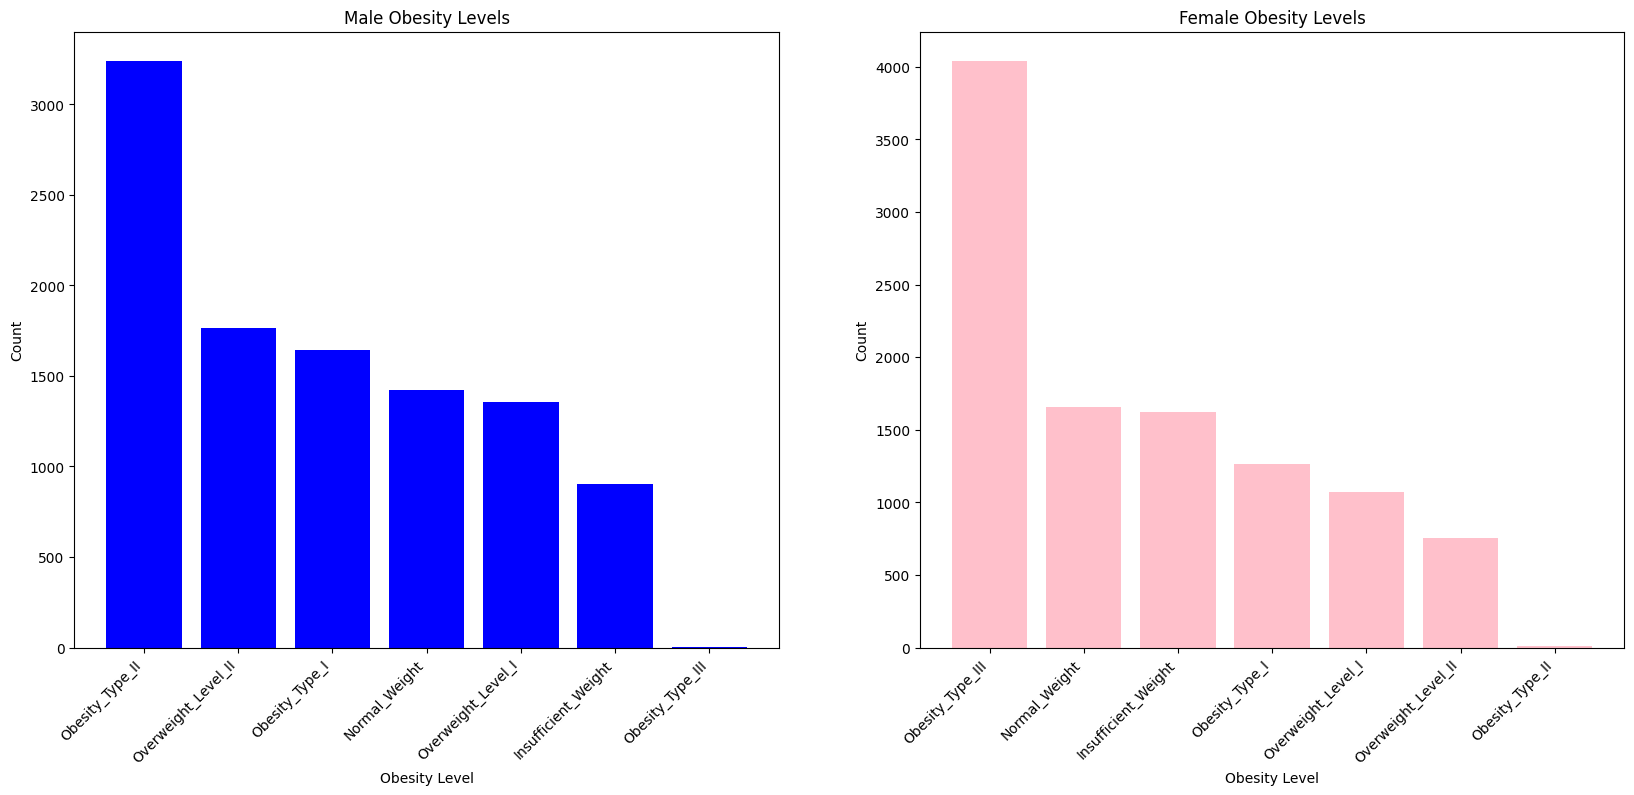

In [13]:
male_data=train[train['Gender']=='Male']
female_data=train[train['Gender']=='Female']
male_obesity_count = male_data['NObeyesdad'].value_counts()
female_obesity_count = female_data['NObeyesdad'].value_counts()

plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
plt.bar(male_obesity_count.index, male_obesity_count.values, color='blue')
plt.xticks(rotation=45,ha='right')
plt.title('Male Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(female_obesity_count.index, female_obesity_count.values, color='pink')
plt.xticks(rotation=45,ha='right')
plt.title('Female Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')

There is a difference between women and men, and it is clear that women suffer more than men from the problem of obesity

In [14]:
train['SMOKE'].value_counts()


SMOKE
no     20513
yes      245
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

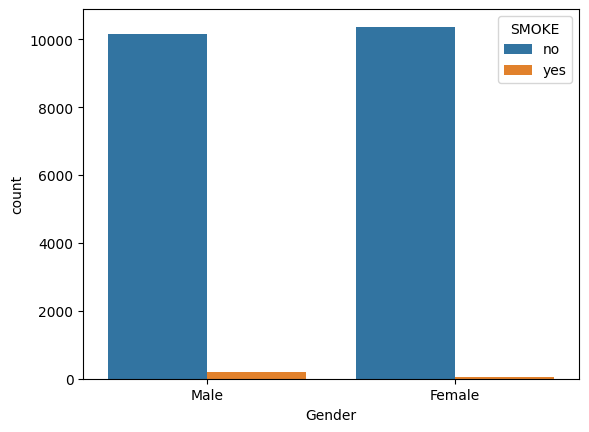

In [15]:
sns.countplot(x='Gender',hue='SMOKE',data=train)

Very few people smoke, I don't think it will be of any use to me, or it might affect the model

<Axes: xlabel='Gender', ylabel='count'>

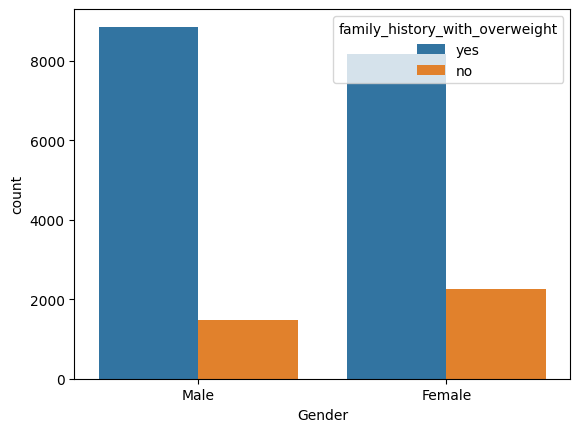

In [16]:
sns.countplot(x='Gender',hue='family_history_with_overweight',data=train)

In [17]:
no_famly_over=train[train['family_history_with_overweight']=='no']
yes_family_over=train[train['family_history_with_overweight']=='yes']

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Overweight_Level_I'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Insufficient_Weight'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Overweight_Level_II'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

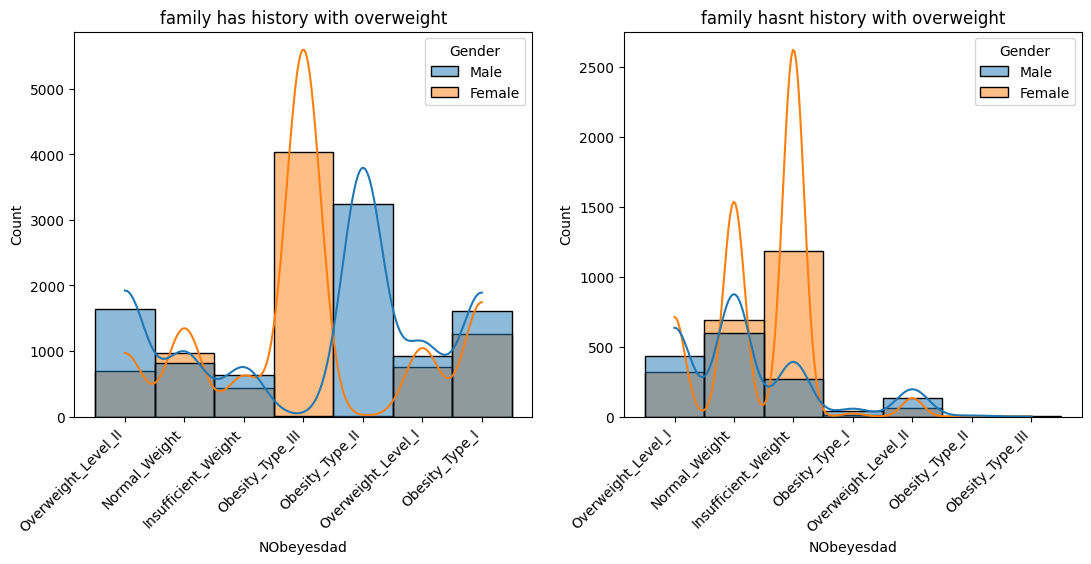

In [18]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.title('family has history with overweight')
sns.histplot(data=yes_family_over,x='NObeyesdad',hue='Gender',kde=True)
plt.xticks(rotation=45,ha='right')

plt.subplot(1,2,2)
plt.title('family hasnt history with overweight')
sns.histplot(data=no_famly_over,x='NObeyesdad',bins=20,kde=True,hue='Gender')
plt.xticks(rotation=45,ha='right')

It's evident that the column family_history_with_overweight has a strong correlation with NObeyesdad, indicating that individuals with a family history of obesity are more likely to suffer from obesity.

In [19]:
train.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Count
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,1
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,1
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,1
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,1
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,1


<Axes: title={'center': 'box plot of age'}, ylabel='Age'>

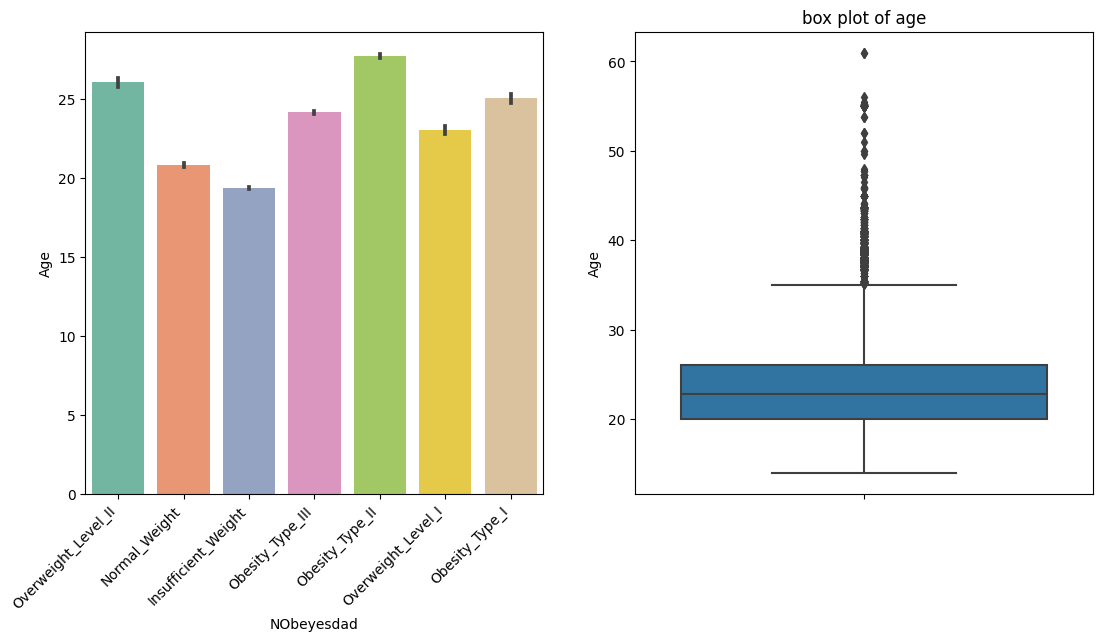

In [20]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)

sns.barplot(x='NObeyesdad',y='Age',data=train,palette="Set2")
plt.xticks(rotation=45,ha='right')

plt.subplot(1,2,2)
plt.title('box plot of age')
sns.boxplot(data=train,y='Age')

It's clear that the majority of individuals suffering from obesity are between 20 and 25 years old. We also have many outliers in the age values that need to be addressed

((array([-3.98746695, -3.77175509, -3.65373797, ...,  3.65373797,
          3.77175509,  3.98746695]),
  array([14., 14., 14., ..., 35., 35., 35.])),
 (3.986526074552317, 22.953099183753302, 0.9718823539948511))

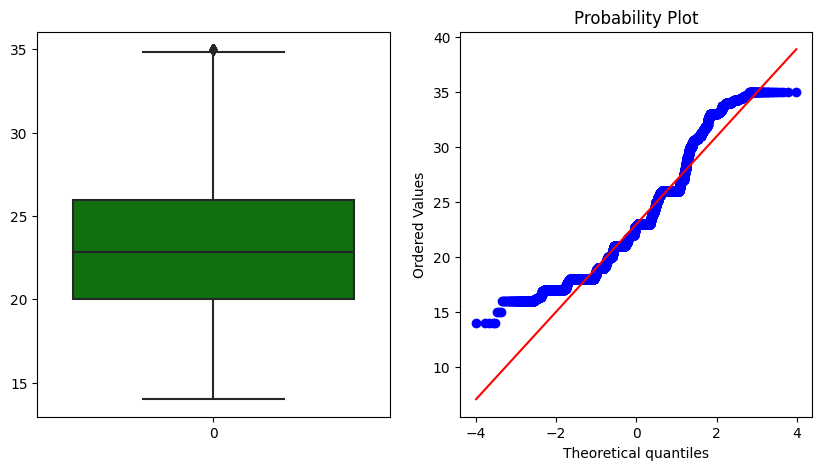

In [21]:
q1, q3 = train['Age'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

train.loc[(train["Age"] < lower_bound) | (train["Age"] > upper_bound), "Age"] = np.nan
train["Age"].fillna(train["Age"].mean(), inplace=True)

fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(train['Age'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(train['Age'],plot=ax2)

We have removed the outliers and replaced them with the average age.

<Axes: xlabel='FAVC', ylabel='count'>

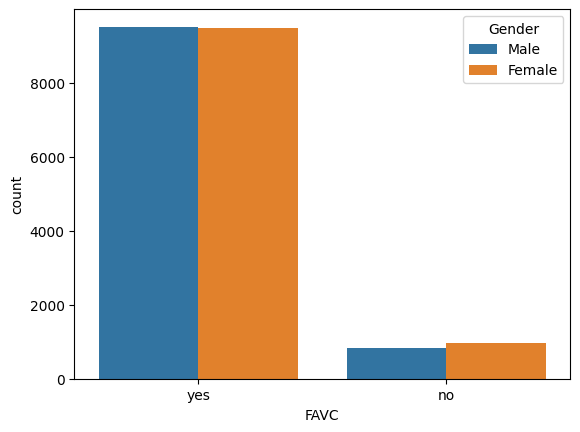

In [22]:
sns.countplot(x='FAVC',hue='Gender',data=train)

In [23]:
yes_fast_food=train[train['FAVC']=='yes']
no_fast_food=train[train['FAVC']=='no']

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_II'),
  Text(2, 0, 'Obesity_Type_I'),
  Text(3, 0, 'Overweight_Level_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

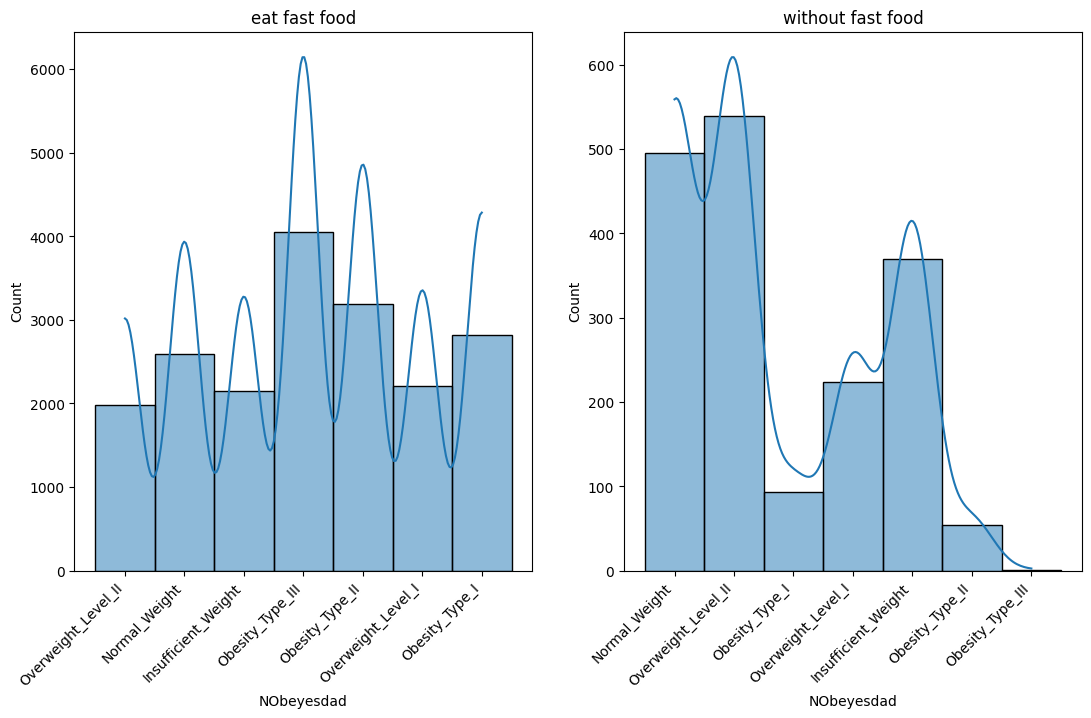

In [24]:
plt.figure(figsize=(13,7))
plt.subplot(1,2,1)
plt.title('eat fast food')
sns.histplot(data=yes_fast_food,x='NObeyesdad',kde=True)
plt.xticks(rotation=45,ha='right')

plt.subplot(1,2,2)
plt.title('without fast food')
sns.histplot(data=no_fast_food,x='NObeyesdad',kde=True)
plt.xticks(rotation=45,ha='right')


It seems from my perspective that there is no strong correlation between individuals who consume fast food and those who do not with obesity

In [25]:
px.histogram(train,x='CAEC')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Public_Transportation'),
  Text(1, 0, 'Automobile'),
  Text(2, 0, 'Walking'),
  Text(3, 0, 'Motorbike'),
  Text(4, 0, 'Bike')])

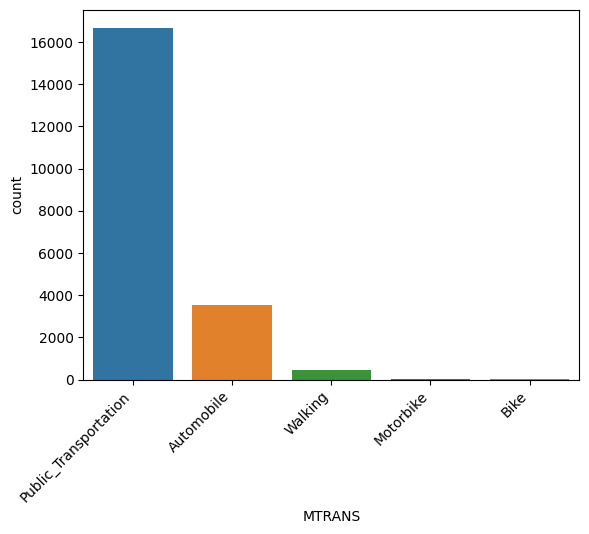

In [26]:
sns.countplot(x='MTRANS',data=train)
plt.xticks(rotation=45,ha='right')

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Overweight_Level_II'),
  Text(1, 0, 'Insufficient_Weight'),
  Text(2, 0, 'Obesity_Type_III'),
  Text(3, 0, 'Overweight_Level_I'),
  Text(4, 0, 'Obesity_Type_I'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Normal_Weight')])

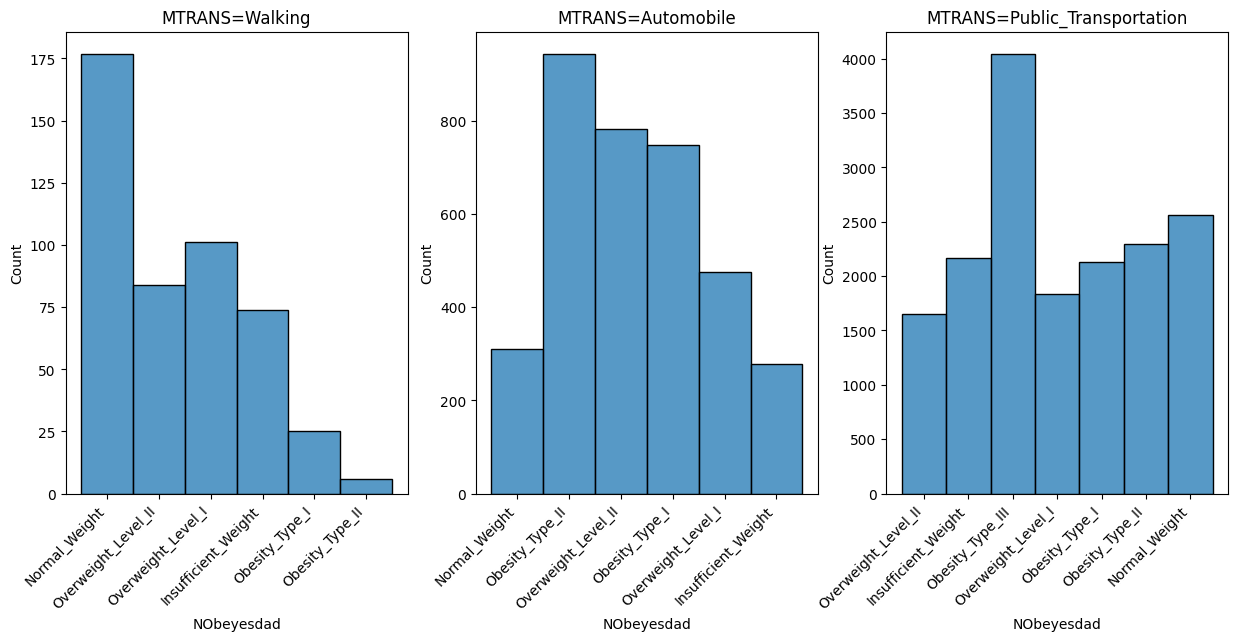

In [27]:
walking_MTRANS=train[train['MTRANS']=='Walking']
Public_Transportation_MTRANS=train[train['MTRANS']=='Public_Transportation']
Automobile_MTRANS=train[train['MTRANS']=='Automobile']

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.title('MTRANS=Walking')
sns.histplot(data=walking_MTRANS,x='NObeyesdad')
plt.xticks(rotation=45,ha='right')

plt.subplot(1,3,2)
plt.title('MTRANS=Automobile')
sns.histplot(data=Automobile_MTRANS,x='NObeyesdad')
plt.xticks(rotation=45,ha='right')

plt.subplot(1,3,3)
plt.title('MTRANS=Public_Transportation')
sns.histplot(data=Public_Transportation_MTRANS,x='NObeyesdad')
plt.xticks(rotation=45,ha='right')

In [28]:
train['CH2O'].mean()

2.029418243665093

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Overweight_Level_II'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Insufficient_Weight'),
  Text(3, 0, 'Obesity_Type_III'),
  Text(4, 0, 'Obesity_Type_II'),
  Text(5, 0, 'Overweight_Level_I'),
  Text(6, 0, 'Obesity_Type_I')])

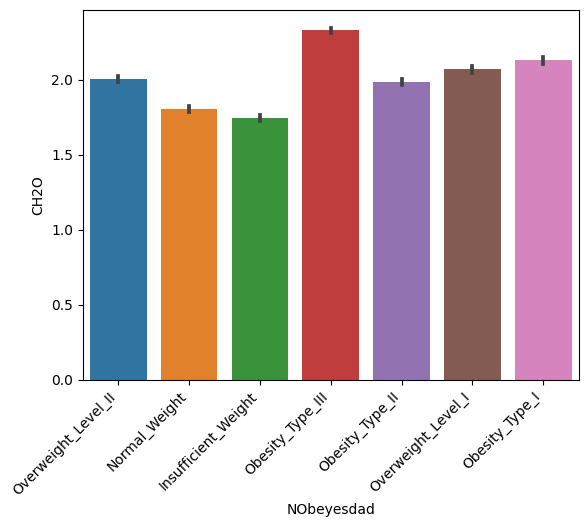

In [29]:
sns.barplot(x='NObeyesdad',y='CH2O',data=train)
plt.xticks(rotation=45,ha='right')

* It's evident that there is no relationship between drinking water and weight gain, as all values are similar
* It seems that those suffering from obesity drink a lot of water

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



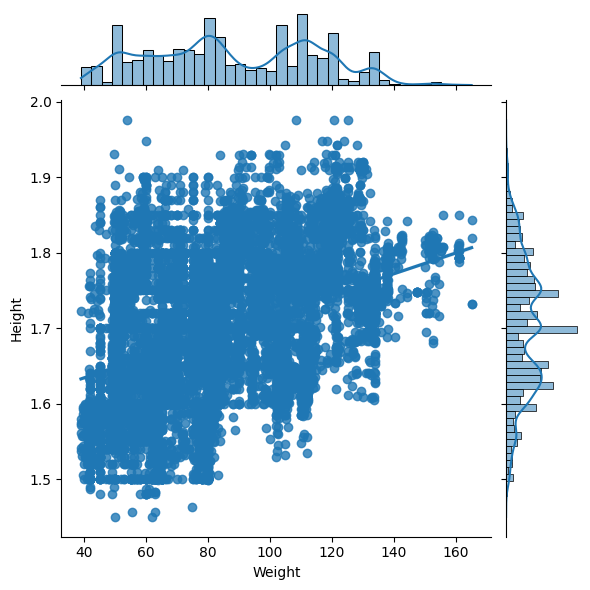

In [30]:
sns.jointplot(data=train,x='Weight',y='Height',kind='reg')

it appears that there is a somewhat positive relationship between ***height*** and ***weight***, as ***weight*** tends to increase with ***height***

In [31]:
train.head(4)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Count
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,1
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,1
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,1
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,1


In [32]:
print('SCC count : ',train['SCC'].value_counts())
print(100*'_')
print('SMOKE count : ',train['SMOKE'].value_counts())
print(100*'_')
print('family_history_overweight :',train['family_history_with_overweight'].value_counts())

SCC count :  SCC
no     20071
yes      687
Name: count, dtype: int64
____________________________________________________________________________________________________
SMOKE count :  SMOKE
no     20513
yes      245
Name: count, dtype: int64
____________________________________________________________________________________________________
family_history_overweight : family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64


we have imbalanced data we should solve this problem

In [33]:
from sklearn.utils import resample
df_minority_smoke=train[train['SMOKE']=='yes']
df_majority_smoke=train[train['SMOKE']=='no']

train_upsampled=resample(df_minority_smoke,replace=True,n_samples=21000,random_state=42)
train=pd.concat([train_upsampled,df_majority_smoke])
train['SMOKE'].value_counts()

SMOKE
yes    21000
no     20513
Name: count, dtype: int64

In [34]:
df_majority_SCC=train[train['SCC']=='no']
df_minority_SCC=train[train['SCC']=='yes']

train_upsampled=resample(df_minority_SCC,replace=True,n_samples=38000,random_state=24)
train=pd.concat([train_upsampled,df_majority_SCC])
train['SCC'].value_counts()

SCC
no     39604
yes    38000
Name: count, dtype: int64

In [35]:

df_minority_over=train[train['family_history_with_overweight']=='no']
df_majority_over=train[train['family_history_with_overweight']=='yes']

train_upsampled=resample(df_minority_over,replace=True,n_samples=55000,random_state=55)
train=pd.concat([train_upsampled,df_majority_over])

train['family_history_with_overweight'].value_counts()


family_history_with_overweight
yes    55422
no     55000
Name: count, dtype: int64

In [36]:
train = train.sample(frac=1, random_state=42).reset_index(drop=True)

In [37]:
train.head(20)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Count
0,10885,Female,18.000000,1.600000,76.000000,no,yes,2.000000,3.000000,Always,no,2.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight,1
1,11447,Male,17.000000,1.750000,70.000000,yes,yes,3.000000,4.000000,Frequently,yes,1.000000,yes,2.000000,1.000000,Sometimes,Automobile,Normal_Weight,1
2,14450,Male,22.953099,1.680000,75.000000,yes,no,2.000000,3.000000,Frequently,yes,1.000000,no,1.000000,0.000000,Sometimes,Automobile,Overweight_Level_I,1
3,16668,Male,30.000000,1.830000,83.000000,yes,yes,3.000000,4.000000,Frequently,yes,2.000000,yes,2.000000,0.000000,Sometimes,Automobile,Overweight_Level_I,1
4,18732,Female,21.000000,1.600000,65.000000,yes,yes,2.000000,3.000000,Sometimes,yes,2.000000,no,2.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,1
5,20578,Male,20.000000,1.750000,75.000000,no,no,3.000000,3.000000,Frequently,yes,1.000000,yes,1.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,1
6,4129,Female,23.000000,1.630000,45.000000,no,no,3.000000,3.000000,Frequently,yes,2.000000,yes,2.000000,0.000000,no,Public_Transportation,Insufficient_Weight,1
7,10389,Male,19.000000,1.650000,68.000000,no,yes,2.000000,3.000000,Always,yes,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,1
8,1483,Female,16.270434,1.567756,65.140408,no,yes,2.000000,1.411808,Sometimes,no,1.879381,yes,0.692123,0.000000,Sometimes,Public_Transportation,Overweight_Level_I,1
9,17460,Female,16.000000,1.600000,45.000000,no,no,3.000000,3.000000,Sometimes,no,2.000000,yes,1.000000,0.000000,no,Public_Transportation,Insufficient_Weight,1


<a id="2"></a>
<div style="text-align: left; background-color: #4CAF50; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1; border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">2| feature engineering and cleaning data 🧠 </div>


### Now we need to drop unnecessary column and convert the catogrical data into numerical to create model ml

In [38]:
train.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Count
0,10885,Female,18.000000,1.60,76.0,no,yes,2.0,3.0,Always,no,2.0,no,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight,1
1,11447,Male,17.000000,1.75,70.0,yes,yes,3.0,4.0,Frequently,yes,1.0,yes,2.0,1.0,Sometimes,Automobile,Normal_Weight,1
2,14450,Male,22.953099,1.68,75.0,yes,no,2.0,3.0,Frequently,yes,1.0,no,1.0,0.0,Sometimes,Automobile,Overweight_Level_I,1
3,16668,Male,30.000000,1.83,83.0,yes,yes,3.0,4.0,Frequently,yes,2.0,yes,2.0,0.0,Sometimes,Automobile,Overweight_Level_I,1
4,18732,Female,21.000000,1.60,65.0,yes,yes,2.0,3.0,Sometimes,yes,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1


In [39]:
train.describe(include='O')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,110422,110422,110422,110422,110422,110422,110422,110422,110422
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
freq,56109,55422,82597,68776,61636,62950,84668,88098,31572


In [40]:
train.drop(['id','Count'],inplace=True,axis=1)

In [41]:
train['Gender'].replace('Female',1,inplace=True)
train['Gender'].replace('Male',0,inplace=True)

In [42]:
train['family_history_with_overweight'].replace('yes',1,inplace=True)
train['family_history_with_overweight'].replace('no',0,inplace=True)


In [43]:
train['CAEC'].replace('no',0,inplace=True)
train['CAEC'].replace('Sometimes',1,inplace=True)
train['CAEC'].replace('Frequently',2,inplace=True)
train['CAEC'].replace('Always',3,inplace=True)


In [44]:
train['CALC'].replace('no',0,inplace=True)
train['CALC'].replace('Sometimes',1,inplace=True)
train['CALC'].replace('Frequently',2,inplace=True)

In [45]:
train['MTRANS'].replace('Public_Transportation',0,inplace=True)
train['MTRANS'].replace('Automobile',1,inplace=True)
train['MTRANS'].replace('Walking',2,inplace=True)
train['MTRANS'].replace('Bike',3,inplace=True)
train['MTRANS'].replace('Motorbike',4,inplace=True)


In [46]:
train['SCC'].replace('yes',1,inplace=True)
train['SCC'].replace('no',0,inplace=True)


In [47]:
train['SMOKE'].replace('yes',1,inplace=True)
train['SMOKE'].replace('no',0,inplace=True)


In [48]:
train['FAVC'].replace('yes',1,inplace=True)
train['FAVC'].replace('no',0,inplace=True)


In [49]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['NObeyesdad'] = le.fit_transform(train['NObeyesdad'])
classes = le.classes_

print("Encoded labels:", train['NObeyesdad'].unique())
print("Original classes:", classes)


Encoded labels: [1 5 0 3 4 2 6]
Original classes: ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


In [50]:
'''
import pandas as pd

dummies = pd.get_dummies(train['NObeyesdad'])

dummies = dummies.astype(int)

train = pd.concat([train, dummies], axis=1)

train.drop(columns=['NObeyesdad'], inplace=True)

train.head()
'''

"\nimport pandas as pd\n\ndummies = pd.get_dummies(train['NObeyesdad'])\n\ndummies = dummies.astype(int)\n\ntrain = pd.concat([train, dummies], axis=1)\n\ntrain.drop(columns=['NObeyesdad'], inplace=True)\n\ntrain.head()\n"

In [51]:
train.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,18.000000,1.60,76.0,0,1,2.0,3.0,3,0,2.0,0,2.0,1.0,1,0,1
1,0,17.000000,1.75,70.0,1,1,3.0,4.0,2,1,1.0,1,2.0,1.0,1,1,1
2,0,22.953099,1.68,75.0,1,0,2.0,3.0,2,1,1.0,0,1.0,0.0,1,1,5
3,0,30.000000,1.83,83.0,1,1,3.0,4.0,2,1,2.0,1,2.0,0.0,1,1,5
4,1,21.000000,1.60,65.0,1,1,2.0,3.0,1,1,2.0,0,2.0,0.0,1,0,1


#### i think the data ready to ML

In [52]:
print(

SyntaxError: incomplete input (149104261.py, line 1)

<a id="2"></a>
<div style="text-align: left; background-color: #4CAF50; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1; border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">2| Machine learning 🧠 </div>


In [53]:
from sklearn.impute import SimpleImputer

#cost fun
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score



from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest

#data scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


#classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn .ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [54]:
X=train.iloc[:,:-1]
y=train.iloc[:,-1]

# cross val score

In [ ]:
cv_score=cross_val_score(XGBClassifier(objective='multi:softmax',learning_rate=0.01,n_estimators=500,max_depth=50),X,y,cv=5)

cv_score

array([0.97043242, 0.96844012, 0.96952545, 0.97020467, 0.96934432])

In [55]:
std=StandardScaler()
X=std.fit_transform(X)

# kbest

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import mutual_info_classif

In [ ]:
X_new = SelectKBest(score_func=f_classif,k=10)
X=X_new.fit_transform(X,y)

In [56]:
X

array([[ 0.98386527, -0.97430624, -0.96750051, ...,  0.53494043,
         0.4524844 , -0.44757196],
       [-1.01639933, -1.19805357,  0.4912218 , ...,  0.53494043,
         0.4524844 ,  1.38002181],
       [-1.01639933,  0.13393645, -0.18951528, ..., -0.93977384,
         0.4524844 ,  1.38002181],
       ...,
       [-1.01639933,  2.38190362,  0.00498103, ...,  0.53494043,
         0.4524844 ,  1.38002181],
       [ 0.98386527, -0.97430624, -1.16199682, ...,  0.53494043,
         0.4524844 , -0.44757196],
       [-1.01639933, -0.97430624,  0.10222918, ...,  0.53494043,
         0.4524844 , -0.44757196]])

In [57]:
y

0         1
1         1
2         5
3         5
4         1
         ..
110417    3
110418    4
110419    6
110420    5
110421    1
Name: NObeyesdad, Length: 110422, dtype: int32

# models

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=203)

In [ ]:
model_logistic=LogisticRegression(max_iter=2000).fit(X_train,y_train)
y_pred=model_logistic.predict(X_test)
cost=accuracy_score(y_test, y_pred) 
cost

0.8984831333484266

In [59]:
model_svc=SVC(kernel='rbf',degree=3,max_iter=3000).fit(X_train,y_train)
y_pred=model_svc.predict(X_test)
cost=accuracy_score(y_test,y_pred)
cost

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning:

Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



0.9688476341408195

In [ ]:
model_forest=RandomForestClassifier(n_estimators=200,max_depth=100,max_features=100).fit(X_train,y_train)
y_pred=model_forest.predict(X_test)
cost=accuracy_score(y_test,y_pred)
cost

In [ ]:
model_tree=DecisionTreeClassifier(max_depth=1200,criterion='entropy',splitter='best').fit(X_train,y_train)
y_pred=model_forest.predict(X_test)
cost=accuracy_score(y_test,y_pred)
cost

In [ ]:
cost2=confusion_matrix(y_test,y_pred)
cost2

In [ ]:
model_xgboost=XGBClassifier(objective='multi:softmax',learning_rate=0.01,n_estimators=500,max_depth=50).fit(X_train,y_train)
y_pred=model_xgboost.predict(X_test)
cost=accuracy_score(y_test,y_pred)
cost

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3777
           1       0.96      0.95      0.95      6335
           2       0.95      0.95      0.95      2146
           3       0.99      0.99      0.99      3292
           4       0.99      1.00      1.00       887
           5       0.92      0.93      0.92      4170
           6       0.91      0.84      0.87      1478

    accuracy                           0.95     22085
   macro avg       0.95      0.95      0.95     22085
weighted avg       0.95      0.95      0.95     22085



# predict

In [60]:
test.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [61]:
test_id=test['id']

In [62]:
test.drop(['id'],axis=1,inplace=True)

In [63]:
test['Gender'].replace('Female',1,inplace=True)
test['Gender'].replace('Male',0,inplace=True)

In [64]:
test['family_history_with_overweight'].replace('yes',1,inplace=True)
test['family_history_with_overweight'].replace('no',0,inplace=True)

In [65]:
test['CAEC'].replace('no',0,inplace=True)
test['CAEC'].replace('Sometimes',1,inplace=True)
test['CAEC'].replace('Frequently',2,inplace=True)
test['CAEC'].replace('Always',3,inplace=True)

In [66]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
test['CALC'] = label_encoder.fit_transform(test['CALC'])

In [67]:
#test['CALC'].replace('no',0,inplace=True)
#test['CALC'].replace('Sometimes',1,inplace=True)
#test['CALC'].replace('Frequently',2,inplace=True)

In [68]:
test['MTRANS'].replace('Public_Transportation',0,inplace=True)
test['MTRANS'].replace('Automobile',1,inplace=True)
test['MTRANS'].replace('Walking',2,inplace=True)
test['MTRANS'].replace('Bike',3,inplace=True)
test['MTRANS'].replace('Motorbike',4,inplace=True)

In [69]:
test['SMOKE'].replace('yes',1,inplace=True)
test['SMOKE'].replace('no',0,inplace=True)

In [70]:
test['FAVC'].replace('yes',1,inplace=True)
test['FAVC'].replace('no',0,inplace=True)

In [71]:
test['SCC'].replace('yes',1,inplace=True)
test['SCC'].replace('no',0,inplace=True)

In [72]:
test.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,1,0,2.825629,0,0.855400,0.000000,2,0
1,1,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,1,0,3.000000,0,1.000000,0.000000,2,0
2,1,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,1,0,2.621877,0,0.000000,0.250502,2,0
3,0,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,1,0,2.786417,0,0.094851,0.000000,2,0
4,1,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,1,0,2.653531,0,0.000000,0.741069,2,0


In [74]:
prediction=model_svc.predict(test)

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning:

X has feature names, but SVC was fitted without feature names



In [75]:
sub=pd.read_csv(r'C:\Users\Lenovo\Downloads\data projects\comp\sample_submission.csv')

In [76]:
sub[:15]

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight
5,20763,Normal_Weight
6,20764,Normal_Weight
7,20765,Normal_Weight
8,20766,Normal_Weight
9,20767,Normal_Weight


In [77]:
data=pd.DataFrame({'id':test_id,'NObeyesdad':prediction})
data

,id,NObeyesdad
0,20758,5
1,20759,5
2,20760,5
3,20761,5
4,20762,5
...,...,...
13835,34593,5
13836,34594,5
13837,34595,5
13838,34596,5


In [78]:
data['NObeyesdad']=le.inverse_transform(prediction)

In [79]:
data[1150:1200]

,id,NObeyesdad
1150,21908,Overweight_Level_I
1151,21909,Overweight_Level_I
1152,21910,Overweight_Level_I
1153,21911,Overweight_Level_I
1154,21912,Overweight_Level_I
1155,21913,Overweight_Level_I
1156,21914,Overweight_Level_I
1157,21915,Overweight_Level_I
1158,21916,Overweight_Level_I
1159,21917,Overweight_Level_I


In [ ]:
#data.to_csv('sub.csv',index=False)